In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd "/content/drive//My Drive/Colab/"

/content/drive/My Drive/Colab


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import SubsetRandomSampler 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import math
import random

**Load CIFAR10**

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### DownSample the Dataset

In [0]:
label_subsets = dict()
for i in range(0,10):
  label_subsets[i] = list()
for i in range(0, len(trainset)): 
  label_subsets[trainset[i][1]].append(tuple((trainset[i][0],trainset[i][1])))

In [0]:
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, l):
        self.samples = tuple(l)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

# data set for each class
dataset_0 = MyDataset(label_subsets[0])
dataset_1 = MyDataset(label_subsets[1])
dataset_2 = MyDataset(label_subsets[2])
dataset_3 = MyDataset(label_subsets[3])
dataset_4 = MyDataset(label_subsets[4])
dataset_5 = MyDataset(label_subsets[5])
dataset_6 = MyDataset(label_subsets[6])
dataset_7 = MyDataset(label_subsets[7])
dataset_8 = MyDataset(label_subsets[8])
dataset_9 = MyDataset(label_subsets[9])

In [0]:
subset_indices = np.random.randint(1,len(dataset_0),40)

#new_set is the dataset with randomly picked 40 points from each class - part A (low data regime) - training
new_set_0 = torch.utils.data.Subset(dataset_0, subset_indices)
new_set_1 = torch.utils.data.Subset(dataset_1, subset_indices)
new_set_2 = torch.utils.data.Subset(dataset_2, subset_indices)
new_set_3 = torch.utils.data.Subset(dataset_3, subset_indices)
new_set_4 = torch.utils.data.Subset(dataset_4, subset_indices)
new_set_5 = torch.utils.data.Subset(dataset_5, subset_indices)
new_set_6 = torch.utils.data.Subset(dataset_6, subset_indices)
new_set_7 = torch.utils.data.Subset(dataset_7, subset_indices)
new_set_8 = torch.utils.data.Subset(dataset_8, subset_indices)
new_set_9 = torch.utils.data.Subset(dataset_9, subset_indices)

sampled_train_dataset = torch.utils.data.ConcatDataset((new_set_0, new_set_1, new_set_2,new_set_3,new_set_4,new_set_5,new_set_6,new_set_7,new_set_8,new_set_9))

sampled_train_loader = torch.utils.data.DataLoader(sampled_train_dataset, batch_size= 4,
                                          shuffle=True, num_workers=2)

# #######generate validation dataset
subset_indices = np.random.randint(1,len(dataset_0),2)

#new_set is the dataset with randomly picked 4 points from each class - part A (low data regime) - validation
new_setval_0 = torch.utils.data.Subset(dataset_0, subset_indices)
new_setval_1 = torch.utils.data.Subset(dataset_1, subset_indices)
new_setval_2 = torch.utils.data.Subset(dataset_2, subset_indices)
new_setval_3 = torch.utils.data.Subset(dataset_3, subset_indices)
new_setval_4 = torch.utils.data.Subset(dataset_4, subset_indices)
new_setval_5 = torch.utils.data.Subset(dataset_5, subset_indices)
new_setval_6 = torch.utils.data.Subset(dataset_6, subset_indices)
new_setval_7 = torch.utils.data.Subset(dataset_7, subset_indices)
new_setval_8 = torch.utils.data.Subset(dataset_8, subset_indices)
new_setval_9 = torch.utils.data.Subset(dataset_9, subset_indices)

sampled_val_dataset = torch.utils.data.ConcatDataset((new_setval_0, new_setval_1, new_setval_2,new_setval_3,new_setval_4,new_setval_5,new_setval_6,new_setval_7,new_setval_8,new_setval_9))

sampled_val_loader = torch.utils.data.DataLoader(sampled_val_dataset, batch_size= 20,
                                          shuffle=True, num_workers=2)




In [0]:
############imbalanced classes
subset_indices_1 = np.random.randint(1,len(dataset_0),100)
subset_indices_2 = np.random.randint(1,len(dataset_0),1000)

#new_set is the dataset with randomly picked 40 points from each class - part A (low data regime) - training
new_set_imbal_0 = torch.utils.data.Subset(dataset_0, subset_indices_1)
new_set_imbal_1 = torch.utils.data.Subset(dataset_1, subset_indices_2)

sampled_imbalanced_train_dataset = torch.utils.data.ConcatDataset((new_set_imbal_0, new_set_imbal_1))

sampled_imbalanced_train_loader = torch.utils.data.DataLoader(sampled_imbalanced_train_dataset, batch_size= 4,
                                          shuffle=True, num_workers=2)

# #######generate validation dataset
subset_indices_imbal = np.random.randint(1,len(dataset_0),10)

#new_set is the dataset with randomly picked 4 points from each class - part A (low data regime) - validation
new_setval_imbal_0 = torch.utils.data.Subset(dataset_0, subset_indices_imbal)
new_setval_imbal_1 = torch.utils.data.Subset(dataset_1, subset_indices_imbal)


sampled_imbalanced_val_dataset = torch.utils.data.ConcatDataset((new_setval_imbal_0, new_setval_imbal_1))

sampled_imbalanced_val_loader = torch.utils.data.DataLoader(sampled_imbalanced_val_dataset, batch_size= 20,
                                          shuffle=True, num_workers=2)

In [0]:
print(len(sampled_train_loader)) # batch size is 4
print(len(sampled_val_loader)) # batch size is 20
print(len(sampled_val_dataset))
print(len(sampled_val_dataset)) 

100
1
20
20


In [0]:
dataiter = iter(sampled_val_loader)
images, labels = dataiter.next()
# print(dataiter.next())
for i in range(2):
  
  print(len(images))
  print(np.bincount(labels))


20
[2 2 2 2 2 2 2 2 2 2]
20
[2 2 2 2 2 2 2 2 2 2]


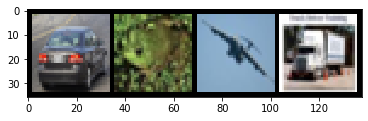

In [0]:
# functions to show an image
def imshow(img):
    # img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(sampled_train_loader)
images, labels = dataiter.next()
# print(dataiter.next())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**CNN to Classify**

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        # x = x.view(-1, 16 * 5 * 5)
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        model_actor = torchvision.models.resnet34(pretrained=True)
        for param in model_actor.parameters():    
          param.requires_grad = False

        # Parameters of newly constructed modules have requires_grad=True by default
        num_ftrs = model_actor.fc.in_features
        model_actor.fc = nn.Linear(num_ftrs, 10) 
        
        action = model_actor(x)
       
        return action


net = Net()
# net = torchvision.models.resnet34(pretrained=False)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)



In [0]:
trainset_resnet = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader_resnet = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader_resnet,0):
        # get the inputs; data is a list of [inputs, labels]

        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
      
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss))
        if i % 2000 == 1999:    # print every 2000 mini-batches
          print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
          running_loss = 0.
        

print('Finished Training')

Files already downloaded and verified
[1,     1] loss: 2.902
[1,     2] loss: 5.662
[1,     3] loss: 8.284
[1,     4] loss: 10.954
[1,     5] loss: 13.757
[1,     6] loss: 16.409
[1,     7] loss: 18.628
[1,     8] loss: 21.155
[1,     9] loss: 23.744
[1,    10] loss: 26.262
[1,    11] loss: 29.633
[1,    12] loss: 31.707
[1,    13] loss: 34.429
[1,    14] loss: 37.452
[1,    15] loss: 40.623
[1,    16] loss: 43.887


KeyboardInterrupt: ignored

In [0]:
########################test the Net################################
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 10 %


**Reinforce**

In [0]:
class PiApproximationWithNN(nn.Module):
    def __init__(self,
                 state_dims,
                 num_actions,
                 alpha,
                 gamma):
        """
        state_dims: the number of dimensions of state space
        action_dims: the number of possible actions
        alpha: learning rate
        gamma: decay factor
        """
        # TODO: implement here
        super(PiApproximationWithNN, self).__init__()
        self.num_actions = num_actions
        self.gamma = gamma
        self.alpha = alpha

        # the actor model
        self.model_actor = torchvision.models.resnet34(pretrained=True)
        for param in self.model_actor.parameters():    
          param.requires_grad = False

        # Parameters of newly constructed modules have requires_grad=True by default
        self.num_ftrs_actor = self.model_actor.fc.in_features
        self.model_actor.fc = nn.Linear(self.num_ftrs_actor, 10)
        self.optimizer = optim.Adam(self.model_actor.parameters(), lr=alpha)
  
    
    def actor(self, state):

        probs = self.model_actor(state)      #gives probability against different labels

        highest_prob_action = []
        log_prob =[]
        for i in range(0,len(probs)):

          prob = probs.data[i]
          highest = torch.argmax(prob).item() + 1 #add 1 for class number
          highest_prob_action.append(highest)
          log_prob.append(torch.log(torch.tensor(prob.data[highest-1].item())))
        
        return torch.tensor(highest_prob_action), torch.tensor(log_prob)

    def discountedWeigthedRewards(self,rewards, weights):

        discounted_rewards = []
        for t in range(len(rewards)):
            Gt = [0,0,0,0] 
            pw = 0
            for r in rewards[t:]:
              # print(r)
              Gt = Gt + [x*0.9**pw for x in r]
              
              pw = pw + 1

            discounted_rewards.append([a*b for a,b in zip(Gt,weights[t])]) 
        return torch.tensor(discounted_rewards)

    def update(self, returns, log_probs):

      policy_gradient = []
      for log_prob, Gt in zip(log_probs, returns):

          policy_gradient.append(torch.mul(log_prob, Gt))
      
      # print(policy_gradient)
     
      self.optimizer.zero_grad()
      policy_gradient = torch.stack(policy_gradient).sum()
    
      policy_gradient = Variable(policy_gradient, requires_grad=True)
      # print(policy_gradient.sum())
      policy_gradient.backward()
      self.optimizer.step()


      # return policy_gradient.sum().item()





In [0]:
class Data_Weight(object):
  def __init__(self, pi, alpha):
    self.pi = pi
    self.alpha = alpha
    self.weights = np.random.randint(1,2,400).reshape((100,4))
    self.decay = 0.1

  def data_manipulation(self, data_loader):
    final_weight = []
    
    for runs in range(0, 20): #400 / size(data_loader)
      data_iter = iter(data_loader)
      images, labels = data_iter.next()
      
      # weights are assigned to each traning exmaple to adapt its effect on model training. -> model = learn weights.
      action, log_prob = self.pi.actor(images) 
      for i in range(0, 20): #len(data_iter) = 20
        if(action[i]==labels[i]):
          final_weight.append(self.weights.reshape((400))[20*runs + i])
        else:
          final_weight.append(0.2)
    print("final_weight is ", str(final_weight))

    # reshape the weight list
    np_array=np.asarray(final_weight)
    reshaped_array = np_array.reshape((100,4))
    final_weight = reshaped_array.tolist()
    return final_weight

  def update(self, update_weights):
    update_weights = np.asarray(update_weights)
    # decay to avoid explosion
    self.weights = np.subtract(self.weights, self.weights * self.decay)
    self.weights = np.subtract(self.weights, update_weights*0.05)
    loss = np.sum(np.subtract(self.weights, update_weights*0.05))
    return loss


    

In [0]:
class env():
    def __init__(self,dataloader):
      self.dataloader = dataloader
        
    def step(self, action, state,trueLabels, step):
        # nextState = iter(state)    #move the data loader to the next batch
        
        reward = self.rewardFun(action, trueLabels)  #call the resnet over here for the current state(x in batches) and get its accuracy by taking the actual traindataset as the base
        if step == len(self.dataloader)-1:
          done = 1
        else:
          done = 0
        #done would be when you run out of data
        return  reward, done
    
    def reset(self):
        state = iter(dataloader) #reset the data loader to the inital value i.e the first batch. 
        return state

    def rewardFun(self, action, trueLabels):      
        # print("action"+str(action))
        # print("trueLabels"+str(trueLabels) )  

        reward=[]
        for i in range(len(action)):
          if action[i]==trueLabels[i]:
            reward.append(1/len(action))
          else:
            reward.append(0.001)
        # print(reward)
        return reward

In [0]:
def REINFORCE(
    env, #open-ai environment
    num_episodes:int,
    pi:PiApproximationWithNN,
    data_weights: Data_Weight
    ):
    """
    implement REINFORCE algorithm with and without baseline.

    input:
        env: target environment; openai gym
        num_episode: #episodes to iterate
        pi: policy
        V: baseline
    output:
        a list that includes the G_0 for every episodes.
    """    
    max_episode_num = num_episodes
    
    numsteps = []
    avg_numsteps = []
    all_rewards = []
    all_losses = []
    

    for episode in range(max_episode_num):
       
        stateLoader = sampled_train_loader # state is the dataloader. 4 images
        log_probs = []      # required for reinforce
        rewards = []        # accuracy after observing x batches. A sequential model. Check how NN perform for sequential models
        stateIter = iter(stateLoader)
        losses = []
       
        for steps in range(0,len(stateLoader)): # range (0, 100)
           
            state, trueLabels = stateIter.next()
            # print("len of state is ", len(state)) # = 4
            action, log_prob = pi.actor(state)
            reward, done = env.step(action,state,trueLabels, steps)
          
            log_probs.append(log_prob)
            rewards.append(reward)
            
            

            if done:
              
              print("* * * after all steps len of reward is ", len(rewards)) # 4*100 = 400
              weights = data_weights.data_manipulation(sampled_val_loader) #400
              returns = pi.discountedWeigthedRewards(rewards, weights)
              # returns   = torch.cat(returns).detach()
              # log_probs = torch.cat(log_probs)
              pi.update(returns, log_probs) #update theta
              
              loss =data_weights.update(weights) #update fi
              print(loss)
              losses.append(loss)
              numsteps.append(steps)
              avg_numsteps.append(np.mean(numsteps[-10:]))
              all_rewards.append(np.sum(rewards))
              all_losses.append(losses)
              if episode % 1 == 0:
                print("episode: {}, total reward: {}, average_reward: {}, length: {}\n".format(episode, np.round(np.sum(rewards), decimals = 3),  np.round(np.mean(all_rewards[-10:]), decimals = 3), steps))
              break
          
            # state = new_state
    
    print(all_losses)
    plt.plot(all_rewards)
    
    plt.xlabel('Episode')
    plt.show()

    return all_rewards, all_losses 


In [0]:
def test_reinforce():
    envh = env(sampled_train_loader)
    policy_gamma = 0.9
    policy_alpha = 3e-4
    pi = PiApproximationWithNN(
        len(sampled_train_loader),
        10,
        policy_alpha, policy_gamma)########batch_size = 4
    alpha_weights = 0.01
    data_weights = Data_Weight(pi, alpha_weights)
    num_episodes = 20
    all_rewards, all_losses = REINFORCE(envh,num_episodes,pi, data_weights)
    return all_rewards, all_losses

In [0]:
all_rewards, all_losses = test_reinforce()

* * * after all steps len of reward is  100
final_weight is  [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 1, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 1, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 1, 0.2, 0.2, 0.2, 1

NameError: ignored

**PPO**

In [0]:
class Data_Weight(object):
  def __init__(self, pi, alpha):
    self.pi = pi
    self.alpha = alpha
    self.weights = np.random.randint(1,10,400).reshape((100,4))
    self.decay = 0.1

  def data_manipulation(self, data_loader):
    final_weight = []
    
    for runs in range(0, 20): #400 / size(data_loader)
      data_iter = iter(data_loader)
      images, labels = data_iter.next()
      
      # weights are assigned to each traning exmaple to adapt its effect on model training. -> model = learn weights.
      action, log_prob = self.pi.actor(images) 
      for i in range(0, 20): #len(data_iter) = 20
        if(action[i]==labels[i]):
          final_weight.append(self.weights.reshape((400))[20*runs + i])
        else:
          final_weight.append(1)
    print("final_weight is ", str(final_weight))

    # reshape the weight list
    np_array=np.asarray(final_weight)
    reshaped_array = np_array.reshape((100,4))
    final_weight = reshaped_array.tolist()
    return final_weight

  def update(self, update_weights):
    # decay to avoid explosion
    self.weights -= self.weights #* self.decay
    self.weights += update_weights

class Data_Weight_imbal(object):
  def __init__(self, pi, alpha):
    self.pi = pi
    self.alpha = alpha
    self.weights = np.random.randint(2,4,1100).reshape((275,4))
    self.decay = 0.1

  def data_manipulation(self, data_loader):
    final_weight = []
    
    for runs in range(0, 55): #400 / size(data_loader)
      data_iter = iter(data_loader)
      images, labels = data_iter.next()
      
      # weights are assigned to each traning exmaple to adapt its effect on model training. -> model = learn weights.
      action, log_prob = self.pi.actor(images) 
      for i in range(0, 20): #len(data_iter) = 20
        if(action[i]==labels[i]):
          final_weight.append(self.weights.reshape((1100))[20*runs + i])
        else:
          final_weight.append(0.5)
    print("final_weight is ", str(final_weight))

    # reshape the weight list
    np_array=np.asarray(final_weight)
    reshaped_array = np_array.reshape((275,4))
    final_weight = reshaped_array.tolist()
    return final_weight

  def update(self, update_weights):

  
    update_weights = np.asarray(update_weights)
    # decay to avoid explosion
    self.weights = np.subtract(self.weights, self.weights * self.decay)
    self.weights = np.subtract(self.weights, update_weights*0.05)
   


In [0]:
class ActorCritic(nn.Module):
    def __init__(self,
                 state_dims,
                 num_actions,
                 alpha,
                 gamma):
        """
        state_dims: the number of dimensions of state space
        action_dims: the number of possible actions
        alpha: learning rate
        gamma: decay factor
        """
        # TODO: implement here
        super(ActorCritic, self).__init__()
        self.num_actions = num_actions
        self.gamma = gamma
        self.alpha = alpha

        # the critic model 
        self.model_critic = torchvision.models.resnet18(pretrained=False)
        for param in self.model_critic.parameters():    
           param.requires_grad = False
        self.num_ftrs_critic = self.model_critic.fc.in_features
        self.model_critic.fc = nn.Linear(self.num_ftrs_critic, 1) 

        # the actor model
        self.model_actor = torchvision.models.resnet34(pretrained=False)
        for param in self.model_actor.parameters():    
          param.requires_grad = False

        # Parameters of newly constructed modules have requires_grad=True by default
        self.num_ftrs_actor = self.model_actor.fc.in_features
        self.model_actor.fc = nn.Linear(self.num_ftrs_actor, 2) 



        

    def critic(self, x):
        
        value = self.model_critic(x)

        return value
      

        
    def actor(self, x):
        
        probs = self.model_actor(x)      #gives probability against different labels

        highest_prob_action = []
        log_prob =[]
        for i in range(0,len(probs)):

          prob = probs.data[i]
          highest = torch.argmax(prob).item() + 1 #add 1 for class number
          highest_prob_action.append(highest)
          log_prob.append(torch.log(torch.tensor(prob.data[highest-1].item())))

        return torch.tensor(highest_prob_action), torch.tensor(log_prob)


      
      

In [0]:
def compute_gae(next_value, rewards, masks, values, gamma=0.99, tau=0.95):
    values = values + [next_value]
    gae = 0
    returns = []
    for step in reversed(range(len(rewards))):
        
        delta = torch.tensor(rewards[step]) + gamma * values[step + 1] * masks[step] - values[step]
        gae = delta + gamma * tau * masks[step] * gae
        returns.insert(0, gae + values[step])
    return returns

In [0]:
policy_gamma = 0.9
alpha = 3e-4
model = ActorCritic(len(sampled_train_loader),10, alpha, policy_gamma)
optimizer = optim.Adam(model.parameters(), lr=alpha)



def ppo_iter(mini_batch_size, states, actions, log_probs, returns, advantage, values):

    batch_size = states.size(0)

    for _ in range(batch_size // mini_batch_size):
        rand_ids = np.random.randint(0, batch_size, mini_batch_size)
        # print(len(states[0]))
        # print(states[rand_ids, :])
        # print(actions[rand_ids, :])
        # print(log_probs[rand_ids, :])
        # print(returns[rand_ids, :])
        # print(advantage[rand_ids, :])
        # print(values[rand_ids, :])
        yield states[rand_ids, :], actions[rand_ids, :], log_probs[rand_ids, :], returns[rand_ids, :], advantage[rand_ids, :], values[rand_ids, :]



def ppo_update(pi, ppo_epochs, mini_batch_size, states, actions, log_probs, returns, advantages, values, clip_param=0.2):

    for _ in range(ppo_epochs):
        for state, action, old_log_probs, return_, advantage, value in ppo_iter(mini_batch_size, states, actions, log_probs, returns, advantages, values):

            # value = pi.critic(state)

            new_log_probs = action

            ratio = (new_log_probs - old_log_probs).exp()

            surr1 = ratio * advantage
            surr2 = torch.clamp(ratio, 1.0 - clip_param, 1.0 + clip_param) * advantage

            actor_loss  = - torch.min(surr1, surr2).mean()
            critic_loss = (return_ - value).pow(2).mean()

            loss = 0.5 * critic_loss + actor_loss - 0.001 


            optimizer.zero_grad()
            loss = Variable(loss, requires_grad=True)
            loss.backward()
            optimizer.step()

        


      


      
     

In [0]:
def PPO(
    env, #open-ai environment
    num_episodes:int,
    pi:PiApproximationWithNN,
    data_weights: Data_Weight
    ):
    """
    implement REINFORCE algorithm with and without baseline.

    input:
        env: target environment; openai gym
        num_episode: #episodes to iterate
        pi: policy
        V: baseline
    output:
        a list that includes the G_0 for every episodes.
    """    
    max_episode_num = num_episodes
    
    numsteps = []
    avg_numsteps = []
    all_rewards = []
    mini_batch_size  = 4
    ppo_epochs       = 4
    threshold_reward = -200

    




    for episode in range(max_episode_num):
       
        # stateLoader = sampled_train_loader # state is the dataloader. 4 images
        stateLoader = sampled_imbalanced_train_loader
        log_probs = []      # required for reinforce
        rewards = []        # accuracy after observing x batches. A sequential model. Check how NN perform for sequential models
        values = []
        states = []
        actions = []
        masks = []
     

        stateIter = iter(stateLoader)
       
        for steps in range(0,len(stateLoader)): # range (0, 100)
           
            state, trueLabels = stateIter.next()
  
            value = pi.critic(state)
            action, log_prob = pi.actor(state)
            reward, done = env.step(action,state,trueLabels, steps)

            log_probs.append(log_prob)
            values.append(value)
            rewards.append(reward)
            masks.append(torch.FloatTensor(1))
     
            # print(value)
            states.append(state)
            actions.append(action)

            # log_probs = [item for sublist in log_probs_list for item in sublist]
            # rewards = [item for sublist in rewards_list for item in sublist]

            
            

            if done:
              
              # print("* * * after all steps len of reward is ", len(rewards)) # 4*100 = 400

              # weights = data_weights.data_manipulation(sampled_val_loader) #400

              weights = data_weights.data_manipulation(sampled_imbalanced_val_loader)
              # returns = pi.discountedWeigthedRewards(rewards, weights)
              next_value = value
              returns = compute_gae(next_value, rewards, masks, values)
              returns   = torch.stack(returns).detach()
              log_probs = torch.stack(log_probs).detach()
              values    = torch.stack(values).detach()
              states    = torch.stack(states)
              actions   = torch.stack(actions)
              advantage = returns - values

              # pi.update(rewards, log_probs, weighted_reward) #update theta
              ppo_update(pi, ppo_epochs, mini_batch_size, states, actions, log_probs, returns, advantage, values)
              data_weights.update(weights) #update fi

              numsteps.append(steps)
              avg_numsteps.append(np.mean(numsteps[-10:]))
              all_rewards.append(np.sum(rewards))
              if episode % 1 == 0:
                print("episode: {}, total reward: {}, average_reward: {}, length: {}\n".format(episode, np.round(np.sum(rewards), decimals = 3),  np.round(np.mean(all_rewards[-10:]), decimals = 3), steps))
              break
          
            # state = new_state
    
    plt.plot(all_rewards)
    
    plt.xlabel('Episode')
    plt.show()

In [0]:
# envh = env(sampled_train_loader)
envh = env(sampled_imbalanced_train_loader)
policy_gamma = 0.9
# policy_alpha = 3e-4
# pi = ActorCritic(len(sampled_train_loader),10, alpha, policy_gamma)
pi = ActorCritic(len(sampled_imbalanced_train_loader),10, alpha, policy_gamma)
# pi = PiApproximationWithNN(
#     len(sampled_train_loader),
#     10,
#     policy_alpha, policy_gamma)########batch_size = 4

alpha_weights = 0.01
# data_weights = Data_Weight(pi, alpha_weights)
data_weights = Data_Weight_imbal(pi, alpha_weights)
num_episodes = 20

PPO(envh,num_episodes,pi, data_weights)

KeyboardInterrupt: ignored

**One step AC**

In [0]:
class SAC(nn.Module):
    def __init__(self,
                 state_dims,
                 num_actions,
                 alpha,
                 gamma):
        """
        state_dims: the number of dimensions of state space
        action_dims: the number of possible actions
        alpha: learning rate
        gamma: decay factor
        """
        # TODO: implement here
        super(ActorCritic, self).__init__()
        self.num_actions = num_actions
        self.gamma = gamma
        self.alpha = alpha

        # the critic model 
        self.model_critic = torchvision.models.resnet18(pretrained=True)
        for param in self.model_critic.parameters():    
           param.requires_grad = False
        self.num_ftrs_critic = self.model_critic.fc.in_features
        self.model_critic.fc = nn.Linear(self.num_ftrs_critic, 1) 

        # the actor model
        self.model_actor = torchvision.models.resnet34(pretrained=True)
        for param in self.model_actor.parameters():    
          param.requires_grad = False

        # Parameters of newly constructed modules have requires_grad=True by default
        self.num_ftrs_actor = self.model_actor.fc.in_features
        self.model_actor.fc = nn.Linear(self.num_ftrs_actor, 10) 

        # the soft Q model 
        self.model_softQ = torchvision.models.resnet50(pretrained=True)
        for param in self.model_softQ.parameters():    
           param.requires_grad = False
        self.num_ftrs_softQ = self.model_softQ.fc.in_features
        self.model_softQ.fc = nn.Linear(self.num_ftrs_softQ, 1) 


    def softQ(self,state,action):
      x = torch.cat([state,action])
      softQ_value = self.model_softQ(x)
      return softQ_value 

    def critic(self, x):
        
        value = self.model_critic(x)

        return value
      

        
    def actor(self, x):
        
        probs = self.model_actor(x)      #gives probability against different labels

        highest_prob_action = []
        log_prob =[]
        for i in range(0,len(probs)):

          prob = probs.data[i]
          highest = torch.argmax(prob).item() + 1 #add 1 for class number
          highest_prob_action.append(highest)
          log_prob.append(torch.log(torch.tensor(prob.data[highest-1].item())))

        return torch.tensor(highest_prob_action), torch.tensor(log_prob)


In [0]:
policy_gamma = 0.9
alpha = 3e-4
model = ActorCritic(len(sampled_train_loader),10, alpha, policy_gamma)
optimizer = optim.Adam(model.parameters(), lr=alpha)



def oac_iter(mini_batch_size, states, actions, log_probs, returns, advantage, values):

    batch_size = states.size(0)

    for _ in range(batch_size // mini_batch_size):
        rand_ids = np.random.randint(0, batch_size, mini_batch_size)
        # print(len(states[0]))
        # print(states[rand_ids, :])
        # print(actions[rand_ids, :])
        # print(log_probs[rand_ids, :])
        # print(returns[rand_ids, :])
        # print(advantage[rand_ids, :])
        # print(values[rand_ids, :])
        yield states[rand_ids, :], actions[rand_ids, :], log_probs[rand_ids, :], returns[rand_ids, :], advantage[rand_ids, :], values[rand_ids, :]



def oac_update(pi, mini_batch_size, states, actions, log_probs, returns, advantages, values):

    for _ in range(ppo_epochs):
        for state, action, old_log_probs, return_, advantage, value in oac_iter(mini_batch_size, states, actions, log_probs, returns, advantages, values):

            

            actor_loss  = - log_probs*returns 
            critic_loss = (return_ - value)

            loss = critic_loss*actor_loss


            optimizer.zero_grad()
            loss = Variable(loss, requires_grad=True)
            loss.backward()
            optimizer.step()






        

In [0]:
def OAC(
    env, #open-ai environment
    num_episodes:int,
    pi:PiApproximationWithNN,
    data_weights: Data_Weight
    ):
    """
    implement REINFORCE algorithm with and without baseline.

    input:
        env: target environment; openai gym
        num_episode: #episodes to iterate
        pi: policy
        V: baseline
    output:
        a list that includes the G_0 for every episodes.
    """    
    max_episode_num = num_episodes
    
    numsteps = []
    avg_numsteps = []
    all_rewards = []
    mini_batch_size  = 4
    ppo_epochs       = 1
 

    for episode in range(max_episode_num):
       
        stateLoader = sampled_train_loader # state is the dataloader. 4 images
        log_probs = []      # required for reinforce
        rewards = []        # accuracy after observing x batches. A sequential model. Check how NN perform for sequential models
        values = []
        states = []
        actions = []
        masks = []
     

        stateIter = iter(stateLoader)
       
        for steps in range(0,len(stateLoader)): # range (0, 100)
           
            state, trueLabels = stateIter.next()
  
            value = pi.critic(state)
            action, log_prob = pi.actor(state)
            reward, done = env.step(action,state,trueLabels, steps)

            log_probs.append(log_prob)
            values.append(value)
            rewards.append(reward)
            masks.append(torch.FloatTensor(1))
     
            # print(value)
            states.append(state)
            actions.append(action)

            # log_probs = [item for sublist in log_probs_list for item in sublist]
            # rewards = [item for sublist in rewards_list for item in sublist]

            
            

            if done:
              
              # print("* * * after all steps len of reward is ", len(rewards)) # 4*100 = 400

              weights = data_weights.data_manipulation(sampled_val_loader) #400
              # returns = pi.discountedWeigthedRewards(rewards, weights)
              next_value = value
              returns = compute_gae(next_value, rewards, masks, values)
              returns   = torch.stack(returns).detach()
              log_probs = torch.stack(log_probs).detach()
              values    = torch.stack(values).detach()
              states    = torch.stack(states)
              actions   = torch.stack(actions)
              advantage = returns - values

              # pi.update(rewards, log_probs, weighted_reward) #update theta
              oac_update(pi, mini_batch_size, states, actions, log_probs, returns, advantage, values)
              data_weights.update(weights) #update fi

              numsteps.append(steps)
              avg_numsteps.append(np.mean(numsteps[-10:]))
              all_rewards.append(np.sum(rewards))
              if episode % 1 == 0:
                print("episode: {}, total reward: {}, average_reward: {}, length: {}\n".format(episode, np.round(np.sum(rewards), decimals = 3),  np.round(np.mean(all_rewards[-10:]), decimals = 3), steps))
              break
          
            # state = new_state
    
    plt.plot(numsteps)
    plt.plot(all_rewards)
    plt.xlabel('Episode')
    plt.show()